In [1]:
import base_compnal
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
from tqdm import tqdm

In [2]:
N = 100
polynomial_degree = 3
num_sweeps = 1000
num_samples = 1000
T_list = np.arange(0.01, 0.021, 0.001)
val = -1.0/scipy.special.binom(N - 1, polynomial_degree - 1)

In [3]:
interaction = [0 for _ in range(polynomial_degree)]
interaction[polynomial_degree - 1] = val

In [4]:
model = base_compnal.model.PolynomialIsing(N, interaction, base_compnal.Lattice.INFINIT_RANGE)
solver = base_compnal.solver.ClassicalMonteCarlo(model, base_compnal.Updater.METROPOLIS)
solver.set_num_sweeps(num_sweeps)
solver.set_num_samples(num_samples)

In [5]:
mag_list_1000 = []
ene_list_1000 = []
for T in tqdm(T_list):
    solver.set_temperature(T)
    solver.run()
    mag_list_1000.append(sum(np.absolute(solver.get_magnetizations()))/num_samples)
    ene_list_1000.append(sum(solver.get_energies())/num_samples/N)

solver.set_num_sweeps(num_sweeps*10)
mag_list_10000 = []
ene_list_10000 = []
for T in tqdm(T_list):
    solver.set_temperature(T)
    solver.run()
    mag_list_10000.append(sum(np.absolute(solver.get_magnetizations()))/num_samples)
    ene_list_10000.append(sum(solver.get_energies())/num_samples/N)

solver.set_num_sweeps(num_sweeps*100)
mag_list_100000 = []
ene_list_100000 = []
for T in tqdm(T_list):
    solver.set_temperature(T)
    solver.run()
    mag_list_100000.append(sum(np.absolute(solver.get_magnetizations()))/num_samples)
    ene_list_100000.append(sum(solver.get_energies())/num_samples/N)

100%|██████████| 11/11 [1:13:20<00:00, 400.03s/it]  


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


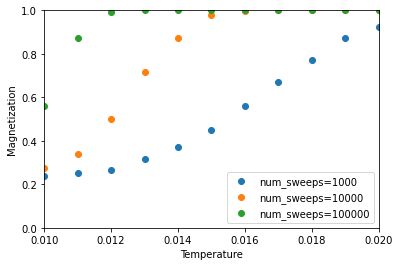

In [6]:
plt.scatter(T_list, mag_list_1000, label="num_sweeps=1000")
plt.scatter(T_list, mag_list_10000, label="num_sweeps=10000")
plt.scatter(T_list, mag_list_100000, label="num_sweeps=100000")
plt.xlim(0.01, 0.02)
plt.ylim(0.0, 1.0)
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.legend()
plt.savefig("out.eps")